In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:

dataset = pd.read_csv("/content/svm.csv")


In [81]:
dataset.head()

,ID,Clump,Unifsize,Unishape,Margadh,Singleepisize,BareNac,Bland Chrom,Norm Nuc,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [82]:
dataset.shape

(699, 11)

In [38]:
dataset.size

7689

In [40]:
dataset.count()

ID               699
Clump            699
Unifsize         699
Unishape         699
Margadh          699
Singleepisize    699
BareNac          699
Bland Chrom      699
Norm Nuc         699
Mit              699
Class            699
dtype: int64

In [83]:
dataset['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

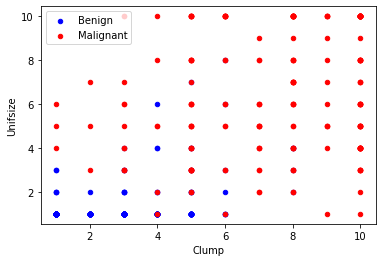

In [84]:
#Visualization
#Filter: we want to choose rows of malignant type
Malignant_dataset=dataset[dataset['Class']==4][0:200]
Benign_dataset=dataset[dataset['Class']==2][0:200]
axes= Benign_dataset.plot(kind='scatter', x='Clump',y='Unifsize', color='Blue', label='Benign')
Malignant_dataset.plot(kind='scatter', x='Clump',y='Unifsize', color='Red', label='Malignant', ax=axes)

In [85]:
#idenitifying unwanted dataset/ rows
dataset.dtypes

ID                int64
Clump             int64
Unifsize          int64
Unishape          int64
Margadh           int64
Singleepisize     int64
BareNac          object
Bland Chrom       int64
Norm Nuc          int64
Mit               int64
Class             int64
dtype: object

In [86]:
#Remove Unwanted rows: convert the value into numeric
dataset=dataset[pd.to_numeric(dataset['BareNac'], errors='coerce').notnull()]
dataset.dtypes
dataset['BareNac']=dataset['BareNac'].astype('int')

In [87]:
dataset.dtypes

ID               int64
Clump            int64
Unifsize         int64
Unishape         int64
Margadh          int64
Singleepisize    int64
BareNac          int64
Bland Chrom      int64
Norm Nuc         int64
Mit              int64
Class            int64
dtype: object

In [88]:
dataset.columns
#Dependent type of attribute:
#Class

Index(['ID', 'Clump', 'Unifsize', 'Unishape', 'Margadh', 'Singleepisize',
       'BareNac', 'Bland Chrom', 'Norm Nuc', 'Mit', 'Class'],
      dtype='object')

In [63]:
feature_set=dataset[['Clump', 'Unifsize', 'Unishape', 'Margadh', 'Singleepisize', 'BareNac','Bland Chrom', 'Norm Nuc', 'Mit']]

In [64]:
#numpy- passing as an argunment in train test split method
#100 rows, 11 colums
#filter 9 columns, independent variable
#independent variable
x=np.asarray(feature_set)
y=np.asarray(dataset['Class'])
x[0:5]

array([[ 5,  1,  1,  1,  2,  3,  1,  1,  1],
       [ 5,  4,  4,  5,  7,  3,  2,  1, 10],
       [ 3,  1,  1,  1,  2,  3,  1,  1,  2],
       [ 6,  8,  8,  1,  3,  3,  7,  1,  4],
       [ 4,  1,  1,  3,  2,  3,  1,  1,  1]])

In [65]:
#divide the data into training part and testing part
#X- 2-D array
#y is 1-D array
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=4)

In [66]:
x_train.shape

(546, 9)

In [67]:
y_test.shape

(137,)

In [71]:
#Modelling, kernel= see data into different set of dimension
from sklearn import svm
classifier= svm.SVC(kernel='linear', gamma='auto', C=2)

In [72]:
#Classifier is used to fit the data
classifier.fit(x_train, y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
y_pred=classifier.predict(x_test)

In [76]:
#evaluate the result
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

